# Understanding India

### Sync Death/Active/Recovered cases' rows

<br /><br />

In [1]:
# Setting the working directory
setwd("~/Documents/COVID-19-India/india-today/")

In [2]:
#library(ggplot2)   # gg menns ->   grammer of graphics
library(tidyverse)
library(stringr)
library(lattice)
library(plyr) # used to calculate the average weight of each group 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




In [3]:
growth = read.csv("ready_to_use/India_Aggregate_summary.csv")
india = read.csv("ready_to_use/India_Aggregate_dateWise_summary.csv")

india$Day = as.factor(india$Day)
class(india$Day)

[1] "factor"

In [4]:
tail(india)

,Country,Date,Day,Confirmed,New.Cases,Doubles.In,Deaths,Recovered,Active.Cases,Closed.Cases,Death.Rate
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
163,India,10/07/2020,163,793802,26506,20,21604,495516,276682,517120,2.72
164,India,11/07/2020,164,820916,27114,20,22123,515386,283407,537509,2.69
165,India,12/07/2020,165,849553,28637,20,22674,534621,292258,557295,2.67
166,India,13/07/2020,166,878254,28701,20,23174,553471,301609,576645,2.64
167,India,14/07/2020,167,906752,28498,20,23727,571460,311565,595187,2.62
168,India,15/07/2020,168,936181,29429,20,24309,592032,319840,616341,2.60


<br /><br />

In [5]:
options(repr.plot.width=16, repr.plot.height=8)

## Line Graplas

### Confirmed (cumulative) Cases over the days

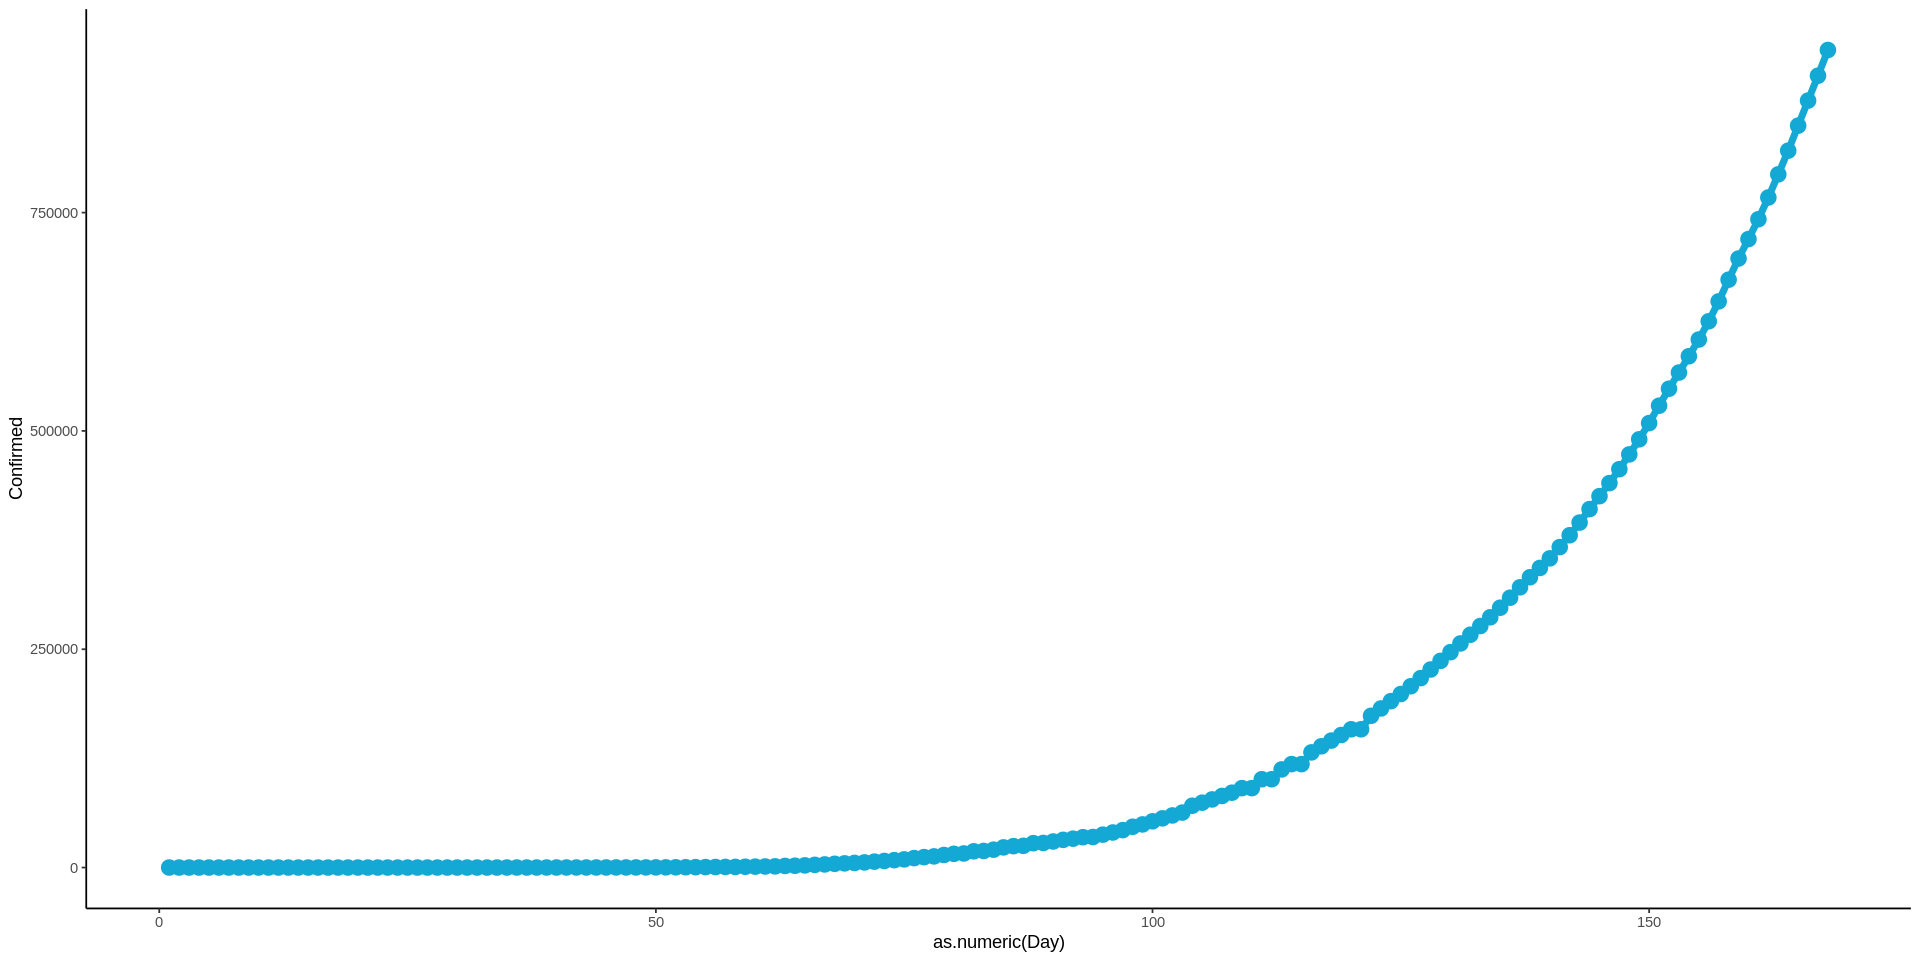

In [6]:
ggplot(india, aes(x=as.numeric(Day), y=Confirmed)) +
    geom_line(color = "#14a9d5", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#14a9d5", size=4)+
    theme_classic()

### New Cases over the days

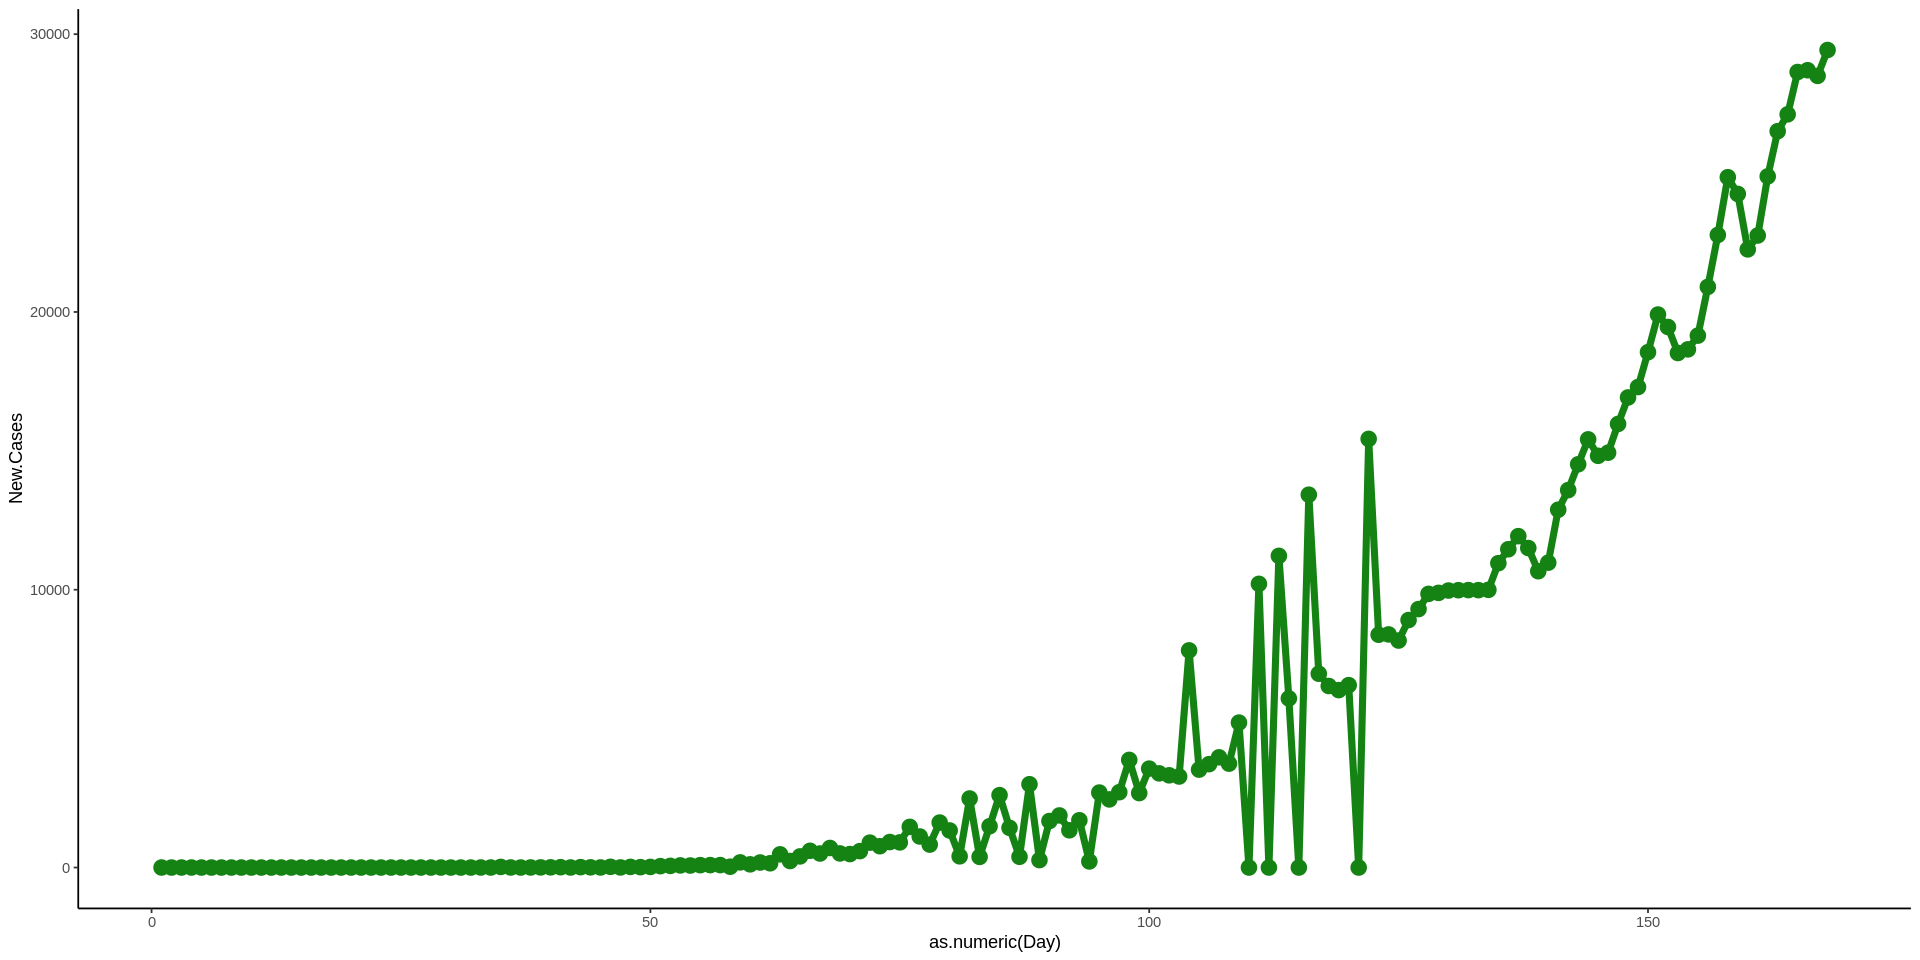

In [7]:
ggplot(india, aes(x=as.numeric(Day), y=New.Cases)) +
    geom_line(color = "#148314", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#148314", size=4)+
    theme_classic()

# Death Rate over the days

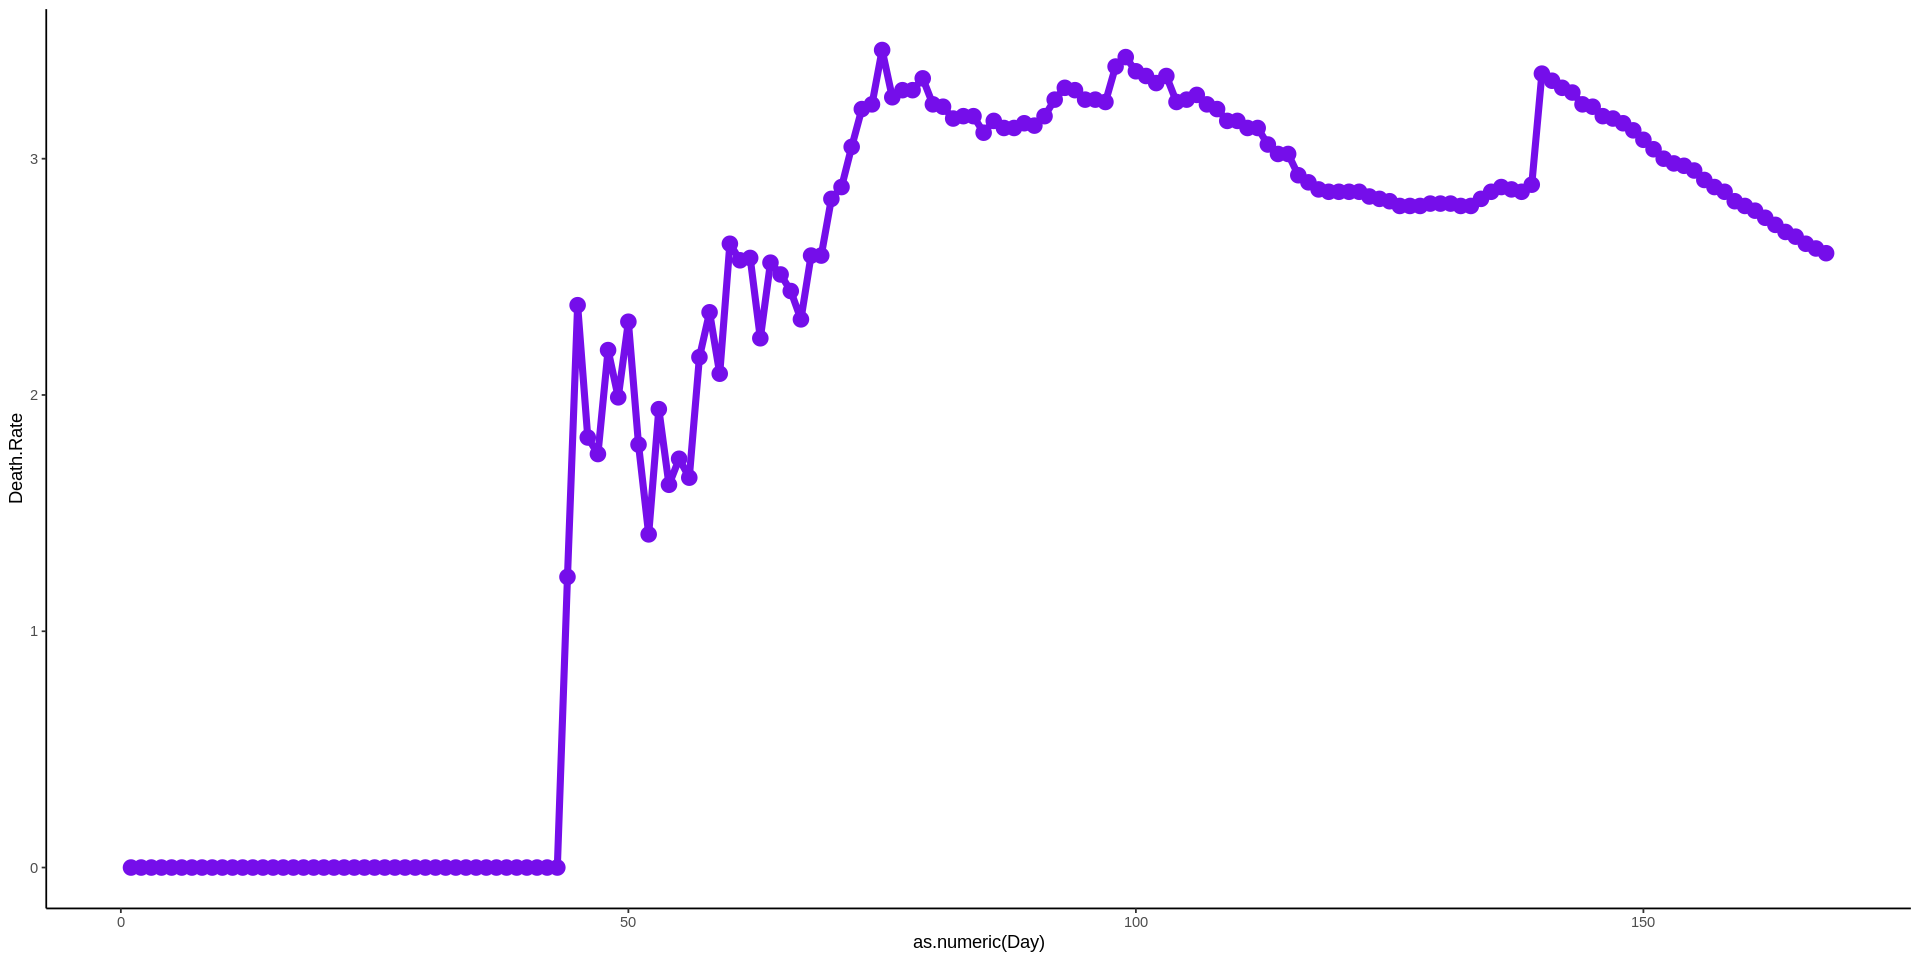

In [8]:
## death rate over the days
ggplot(india, aes(x=as.numeric(Day), y=Death.Rate)) +
    geom_line(color = "#750eea", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#750eea", size=4)+
    theme_classic()
    

<br />

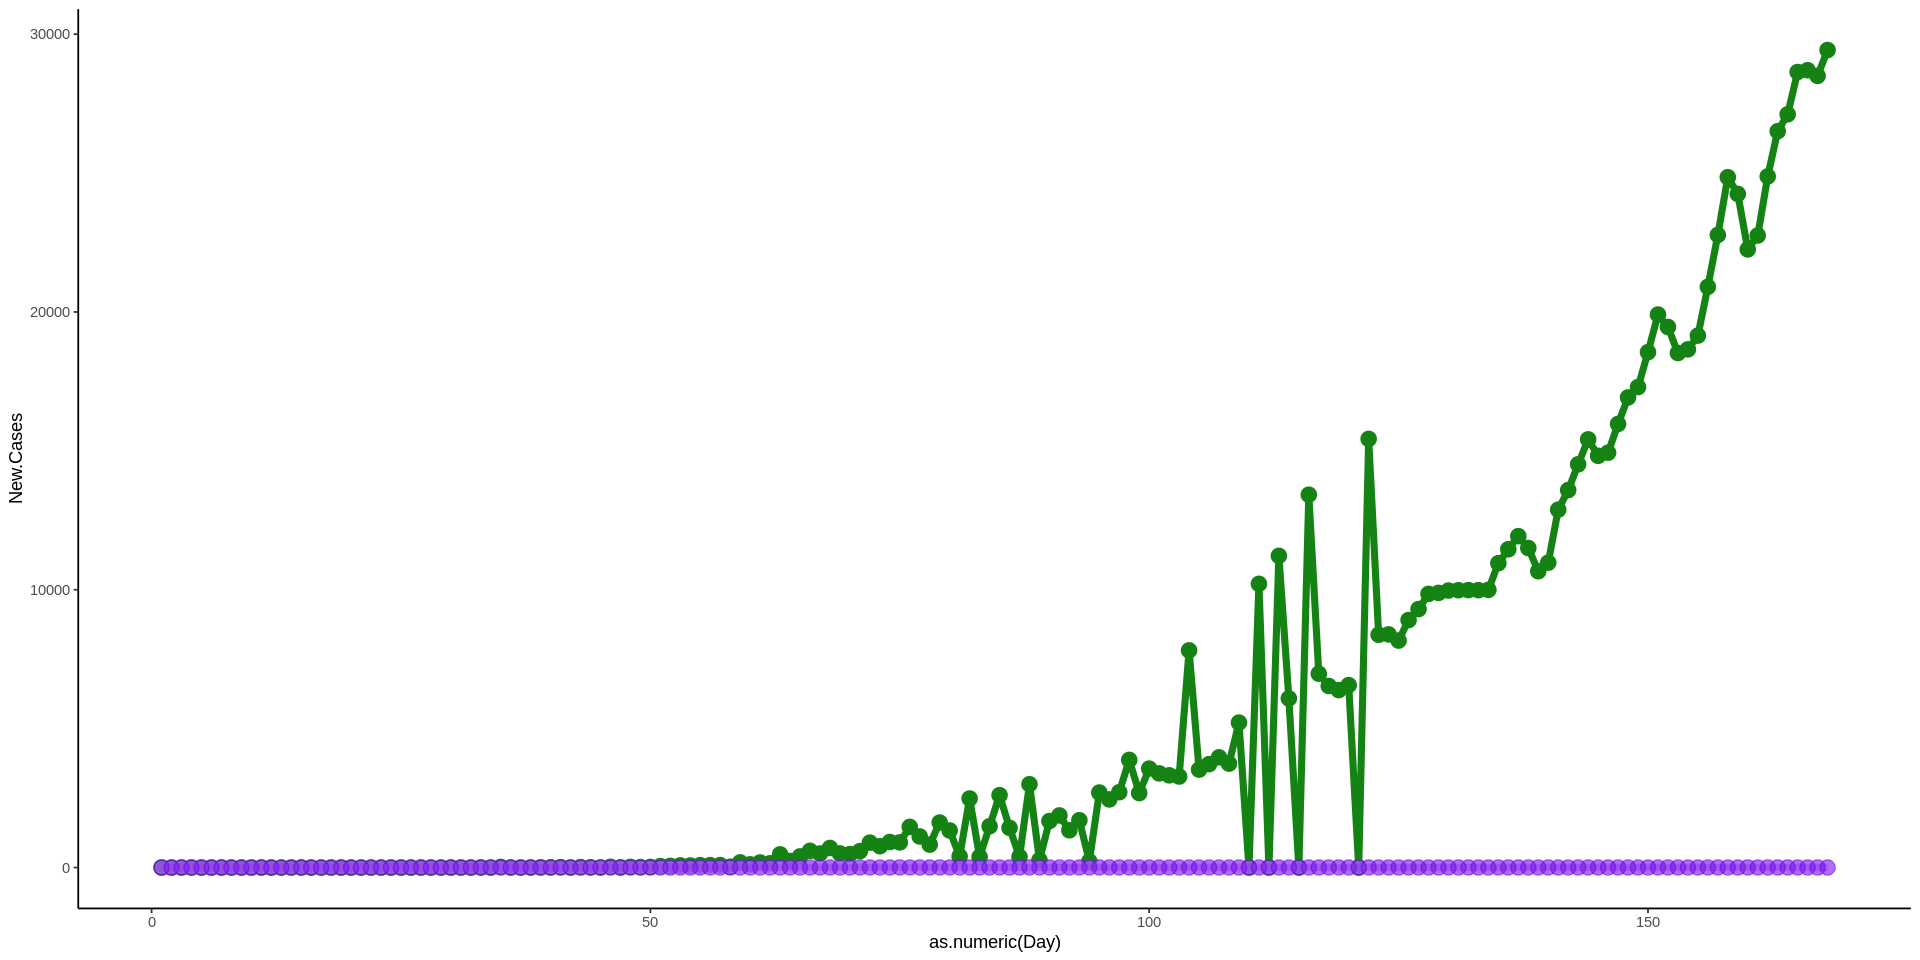

In [9]:
# merged
ggplot(india, aes(x=as.numeric(Day), y=New.Cases)) +
    geom_line(color = "#148314", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#148314", size=4) +

    geom_line(aes(y=Death.Rate), color = "#750eea", size=2, alpha = 0.6) +
    geom_point(aes(y=Death.Rate), color = "#ffffff", size=3, alpha = 0.6) +
    geom_point(aes(y=Death.Rate), color = "#750eea", size=4, alpha = 0.6) +
    theme_classic()

<br /><br />

## Histograms

In [10]:
theme_set(theme_classic())

In [11]:
days = as.numeric(india$Day)
#days

<br />

#### Confirmed

In [12]:
#### adding 
df = NULL

d = NULL
conf = NULL
for(day in days){
    d = c(d, rep(day, as.numeric(india$Confirmed[day])))
    conf = c(conf, rep(1, as.numeric(india$Confirmed[day])))
}

df = cbind(Day = d, Confirmed = conf)

In [13]:
df = as.data.frame(df)

In [14]:
head(df)

,Day,Confirmed
,<dbl>,<dbl>
1,1,1
2,2,1
3,3,1
4,3,1
5,4,1
6,4,1


In [ ]:
# Confirmed cases with Days
ggplot(df, aes(x = Day, fill = factor(Confirmed))) +
  geom_histogram(binwidth = 0.5) +
  xlab("Days") +
  ylab("Confirmed Cases")

<br /><br />


#### New Cases

In [ ]:
## adding new cases

n = NULL
for(day in days){
    ones = as.numeric(india$New.Cases[day])
    zeros = as.numeric(india$Confirmed[day]) - as.numeric(india$New.Cases[day])
    
    n = c(n, c(rep('New', ones), rep('Old', zeros)))
    #n = c(n, c(rep(1, ones), rep(0, zeros)))
}

## 0: old cases
## 1: new cases

df = cbind(df, New = n)

In [ ]:
head(df)

In [ ]:
## days with old and new cases
ggplot(df, aes(x = Day, fill = factor(New))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br />

#### Active Cases

In [ ]:
## adding case-status (Active/Closed)
# closed = 1
# active = 0

s = NULL
for(day in days){
    zeros = as.numeric(india$Active.Cases[day]) # active
    ones = as.numeric(india$Closed.Cases[day]) # closed
    
    s = c(s, c(rep('Active', zeros), rep('Closed', ones)))
    #s = c(s, c(rep(0, zeros), rep(1, ones)))
}

df = cbind(df, Status = s)

In [ ]:
tail(df)

In [ ]:
## days with status & confirmed
ggplot(df, aes(x = Day, fill = factor(Status))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />

In [ ]:
# Adding deaths

## 0: not dead
## 1: dead
flag.day = -1
flag.deathCount = -1

df = cbind(df, Deaths = NA)
counter = 1

for(day in days){
        
        conf = as.numeric(india$Confirmed[day])
        deaths = as.numeric(india$Deaths[day])
        for(i in 1:conf){
            if(i > conf-deaths)
            {
                df$Deaths[counter] = 'Dead' #1
                counter = counter+1
            }
            else
            {
                df$Deaths[counter] = 'Alive' #0
                counter = counter+1
            }
        }
}

In [ ]:
tail(df)

In [ ]:
## days with deaths & confirmed
ggplot(df, aes(x = Day, fill = factor(Deaths))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Death Cases")

<br /><br />

In [ ]:
# Adding Recovered
df = cbind(df, Recovered = NA)
## 0: not recovered
## 1: recovered


for(i in 1:nrow(df)){
    if(df$Status[i] == 'Active'){
        df$Recovered[i] = 'Not Recovered' #0
    }
    else{
        if(df$Deaths[i] == 'Alive'){
            df$Recovered[i] = 'Recovered' #1
        }
        else{
            df$Recovered[i] = 'Not Recovered' #0
        }
    }
}

In [ ]:
#df = df[,-6]
tail(df)

In [ ]:
## days with recovered & confirmed
ggplot(df, aes(x = Day, fill = factor(Recovered))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />

In [ ]:
# Adding Overall Status ---> active/dead/recovered
df = cbind(df, Overall.Status = NA)
## 0: not recovered
## 1: recovered


for(i in 1:nrow(df)){
    if(df$Status[i] == 'Active'){
        df$Overall.Status[i] = 'Active' #1  # active
    }
    else{
        if(df$Deaths[i] == 'Alive'){
            df$Overall.Status[i] = 'Alive' #2 # recovered
        }
        else{
            df$Overall.Status[i] = 'Dead' #3 # dead
        }
    }
}

In [ ]:
tail(df)

In [ ]:
## days with recovered & confirmed
ggplot(df, aes(x = Day, fill = factor(Overall.Status))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />